In [2]:
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

__Problem__

Consider a nonlinear model of the form $f(x,\beta) = \beta_0 + \beta_1 exp(-\beta_2 x^2)$ and a set of observations $(x_i, y_i)$. We add random noise to the observations to the true values and we solve minimization problem that gives the best least square estimates of the parameters $\beta$.

In [3]:
beta = (0.25, 0.75, 0.5)

In [4]:
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2*x**2)

In [15]:
# generate randomized data points that simulate the observatinos
xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.1*np.random.randn(len(xdata))

In [16]:
# define residual function
def g(beta):
    return ydata - f(xdata, *beta)

In [17]:
# set initial guess for beta and then using optimize.leastsq
beta_init = (1,1,1)
beta_opt, beta_cov = optimize.leastsq(g, beta_init)
beta_opt

array([0.24911836, 0.73622624, 0.56423805])

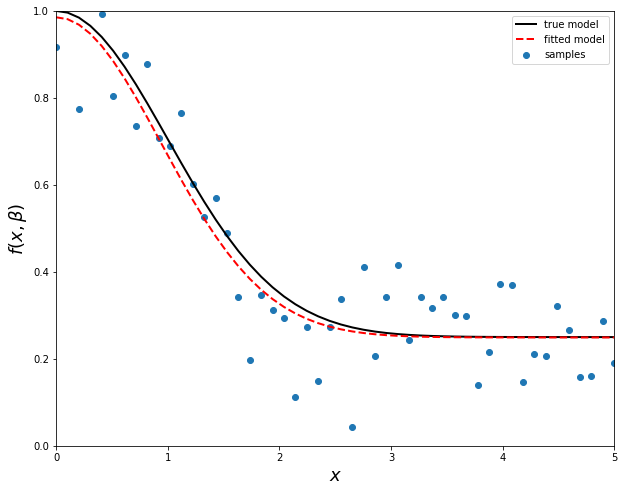

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'k', lw='2', label='true model')
ax.plot(xdata, f(xdata, *beta_opt), '--r', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

In [19]:
# You can also use curve_fit without the need to define residual function
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24911836, 0.73622624, 0.56423805])